# <a id='toc1_'></a>[Análisis Tienda en Linea](#toc0_)

## <a id='toc1_1_'></a>[Contexto:](#toc0_)

Eres analista en una gran tienda en línea. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

## <a id='toc1_2_'></a>[Tabla de contenidos](#toc0_)

- [Análisis Tienda en Linea](#toc1_)    
  - [Contexto:](#toc1_1_)    
  - [Tabla de contenidos](#toc1_2_)    
- [Introducción](#toc2_)    
- [Preparación para el Análisis](#toc3_)    
- [Priorizar Hipótesis](#toc4_)    
  - [Framework ICE](#toc4_1_)    
  - [Framework RICE](#toc4_2_)    
- [Análisis de test A/B](#toc5_)    
  - [Ingresos acumulados por grupo](#toc5_1_)    
  - [Tamaño de pedidos acumulados por grupo](#toc5_2_)    
  - [Diferencia relativa en el tamaño de pedido](#toc5_3_)    
  - [Tasa de Conversión de cada grupo](#toc5_4_)    
  - [Gráficando el numero de pedidos por usuario](#toc5_5_)    
  - [Calculo de percentiles 95 y 99 para el numero de pedidos por usuario](#toc5_6_)    
  - [Gráficando precio de pedidos](#toc5_7_)    
  - [Calculo de Percentiles 95 y 99 para el precio de pedido](#toc5_8_)    
  - [Significancia estadística de la diferencia en la conversión de los dos grupos (Datos en Bruto)](#toc5_9_)    
  - [Significancia estadística de la diferencia en el tamaño promedio entre los grupos (Datos en bruto)](#toc5_10_)    
  - [Significancia estadística de la diferencia en la conversión de los dos grupos (Datos filtrados)](#toc5_11_)    
  - [Significancia estadística de la diferencia en el tamaño promedio entre los grupos (Datos en filtrados)](#toc5_12_)    
- [Conclusiones](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Introducción](#toc0_)

Una tienda en linea genero una lista de hipótesis que pueden ayudar a aumentar los ingresos por lo que solicita que se priorice la lista para tomar la decisión de que hipótesis probar en un test A/B. 

Después de realizar la prueba A/B analizaremos los resultados y observaremos si comprueba la hipótesis.

Este proyecto se desglosara en dos partes.

1. Priorizar hipótesis 
2. Análisis de test A/B

Conforme vayamos avanzando en el proyecto iremos explicando dichas partes.

# <a id='toc3_'></a>[Preparación para el Análisis](#toc0_)

En este apartado cargaremos la librerías necesarias para la elaboración de este proyecto.

In [1]:
# Cargando las librerías
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

Una vez cargadas procedemos a la primera parte.

# <a id='toc4_'></a>[Priorizar Hipótesis](#toc0_)

Para esta parte vamos a hacer uso del archivo `hypotheses_us.csv` el cual contiene la siguiente información: 

`hypotheses_us.csv`:

- `Hypotheses`: breves descripciones de las hipótesis
- `Reach`: alcance del usuario, en una escala del uno a diez
- `Impact`: impacto en los usuarios, en una escala del uno al diez
- `Confidence`: confianza en la hipótesis, en una escala del uno al diez
- `Effort`: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor `Effort`, más recursos requiere la prueba.

In [2]:
# Cargando el archivo "hypotheses_us.csv"
hypotheses = pd.read_csv('./datasets/hypotheses_us.csv', sep=';')
print(hypotheses.info())
hypotheses.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


Como podemos observar en los datos del archivo proporcionados, contamos con 9 hipótesis, cada una de ellas tiene un puntaje de "Alcance(Reach)", "Impacto(Impact)", "Confianza(Confidence)" y "Esfuerzo(Effort)". Sin embargo antes de empezar a calcular la prioridad por hipótesis, aplicaremos las buenas practicas y cambiaremos los nombres de las columnas a que todos sus caracteres sean minúsculas.

In [3]:
# Cambiando los nombres de las columnas a minúsculas:
hypotheses.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'effort']
hypotheses.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')

Una vez corroborado esta cambio podemos proceder a priorizar las hipótesis.

Para poder priorizar las 9 hipótesis listadas en la base de datos usaremos dos frameworks; "ICE" y "RICE".

## <a id='toc4_1_'></a>[Framework ICE](#toc0_)

De acuerdo a este método, nosotros podemos calcular el puntaje ICE aplicando la siguiente formula:

$\frac{Impacto(Impact) * Confianza(confidence)}{Esfuerzo(Effort)}$

Aclarado esto procedemos a calcular el puntaje ICE de la base de datos proporcionada.

**NOTA**: Dejaremos el nombre de la columna en mayúsculas en este caso para identificarla con mayor facilidad. 

In [4]:
# Calculando ICE
hypotheses['ICE'] = (hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']

# Mostramos la hipótesis y su puntaje de ICE
display(hypotheses[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


Como podemos ver en la tabla anterior, vemos que la hipótesis "Lanzar una promoción que ofrezca descuentos a los usuarios en sus cumpleaños (Launch a promotion that gives users discounts on their birthdays)" es la hipótesis con mayor prioridad alcanzando 16.20 puntos de acuerdo al Framework ICE.

## <a id='toc4_2_'></a>[Framework RICE](#toc0_)

Ahora procederemos a calcular el puntaje de RICE, para ello necesitaremos la siguiente formula:

$\frac{Alcance(Reach) * Impacto(Impact) * Confianza(confidence)}{Esfuerzo(Effort)}$

**NOTA**: Al igual que con la columna "ICE", dejaremos en mayúsculas el nombre de la columna para "RICE"

In [5]:
# Calculando RICE
hypotheses['RICE'] = (hypotheses['reach']*hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']

# Mostramos la hipótesis y su puntaje de RICE
display(hypotheses[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


En este caso la hipótesis con mayor prioridad seria "Añada un formulario de suscripción a todas las páginas principales. Esto le ayudará a compilar una lista de correos.(Add a subscription form to all the main pages. This will help you compile a mailing list)" con un puntaje de RICE de 112. 

A continuación mostraremos ambos resultados:

In [6]:
# Mostramos la hipótesis y su puntaje de ICE
display(hypotheses[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))
# Mostramos la hipótesis y su puntaje de RICE
display(hypotheses[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


,hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


Explicando un poco estos resultados retrocedemos para explicar los parámetros que se usaron para calcular estas métricas:

*Reach* (Alcance): cuántos usuarios se verán afectados por la actualización que quieres introducir.
*Impact* (Impacto): en qué medida afectará esta actualización a los usuarios, su experiencia y su satisfacción con el producto.
*Confidence* (Confianza): qué tan seguro estás de que tu producto les afectará de esta manera.
*Effort* (Esfuerzo): cuánto costará probar la hipótesis.

La diferencia de puntajes para los dos Frameworks se debe al parámetro "Alcance", dado que en el método ICE no hacemos uso de este parámetro su resultado no contempla que tantos usuarios afectara esta hipótesis. Sin embargo en sus resultados la hipótesis con mayor prioridad en el Framework RICE toma el 3er lugar de prioridad, lo cual muestra una prioridad relativamente alta con 11 puntos.

Si analizamos la tabla del Framework RICE, la hipótesis que quedo en primer lugar para el método ICE quedo en 8vo lugar. Teniendo presente estos hechos se decidió que la hipótesis seleccionada a realizar la prueba A/B será: 

**"Añada un formulario de suscripción a todas las páginas principales. Esto le ayudará a compilar una lista de correos.(Add a subscription form to all the main pages. This will help you compile a mailing list)"**

# <a id='toc5_'></a>[Análisis de test A/B](#toc0_)

Una vez definida la hipótesis a probar, se realizo una prueba A/B. Los resultados de esta prueba se almacenaron en dos archivos: `orders_us.csv` y `visits_us.csv`. Dichos archivos contienen la siguiente información:

`orders_us.csv`:

- `transactionId`: identificador de pedido
- `visitorId`: identificador del usuario que realizó el pedido
- `date`: fecha del pedido
- `revenue`: ingresos del pedido
- `group`: el grupo del test A/B al que pertenece el usuario

`visits_us.csv`:

- `date`: la fecha
- `group`: grupo del test A/B
- `visits`: el número de visitas en la fecha especificada para el grupo de test A/B especificado



In [7]:
# Cargando archivos
# Ordenes
orders = pd.read_csv('./datasets/orders_us.csv', sep=',')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
# Visitas
visitors = pd.read_csv('./datasets/visits_us.csv', sep=',')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

# Mostrando las primeras 5 filas de ambas tablas
display(orders.head())
display(visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Una vez cargados los datos analizaremos la información obtenida. 

## <a id='toc5_1_'></a>[Ingresos acumulados por grupo](#toc0_)

A continuación mostraremos los ingresos acumulados por grupo y lo representaremos gráficamente. Para ello primeramente obtendremos los datos diarios acumulados sobre los pedidos y visitantes.

In [8]:
# Creamos una matiz con valores únicos de parejas Fecha-Grupo
datesGroups = orders[['date', 'group']].drop_duplicates()

# Obtenemos los datos diarios acumulados agregados sobre los pedidos
ordersAggregated = datesGroups.apply(
    lambda x: 
        orders[np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
                {'date': 'max',
                'group': 'max',
                'transactionId': pd.Series.nunique,
                'visitorId': pd.Series.nunique,
                'revenue': 'sum'}
        ), axis=1).sort_values(by=['date','group'])

# Obtenemos los datos diarios acumulados agregados sobre los visitantes
visitorsAggregates = datesGroups.apply(
    lambda x:
        visitors[np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
                {'date': 'max',
                'group': 'max',
                'visits': 'sum'}
            ), axis=1).sort_values(by=['date','group'])

# Fusionamos las dos tablas en una y daremos nombres mas descriptivos a sus columnas
cumulativeData = ordersAggregated.merge(
    visitorsAggregates, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# Mostramos la tabla de la información acumulada
display(cumulativeData.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


Una vez teniendo estos resultados podemos crear los gráficos de ingresos acumulados por día y grupo de la prueba A/B:

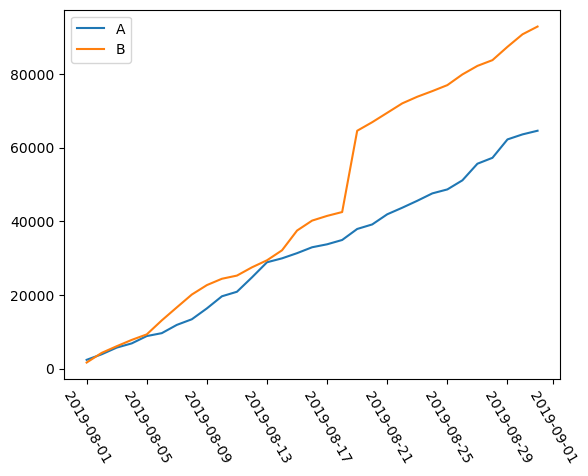

In [9]:
# Creamos un Dataframe con pedidos acumulados e ingresos acumulados por dia, grupo A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date', 'revenue', 'orders']]

# Creamos un Dataframe con pedidos acumulados e ingresos acumulados por dia, grupo B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date', 'revenue', 'orders']]

# Trazamos el gráfico de ingresos del grupo A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Trazamos el gráfico de ingresos del grupo B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xticks(rotation=300)
plt.legend()

Como podemos ver, los ingresos aumentan constantemente durante toda la prueba, sin embargo notamos un aumento de ingresos por parte del grupo "B" entre las fechas 17-08-2019 y 21-08-2019 mostrando una clara ventaja sobre los resultados del grupo "A". Este comportamiento pudo haberse visto retrasado por que puede que en los primeros días se recabaron los correos y en el momento donde se vio el pico al alza fue cuando se empezaron a mandar correos a la lista recabada. 

## <a id='toc5_2_'></a>[Tamaño de pedidos acumulados por grupo](#toc0_)

A continuación usaremos la tabla generada en la sección pasada para generar las gráficas del comportamiento de ambos grupos en relación a los pedidos acumulados. 

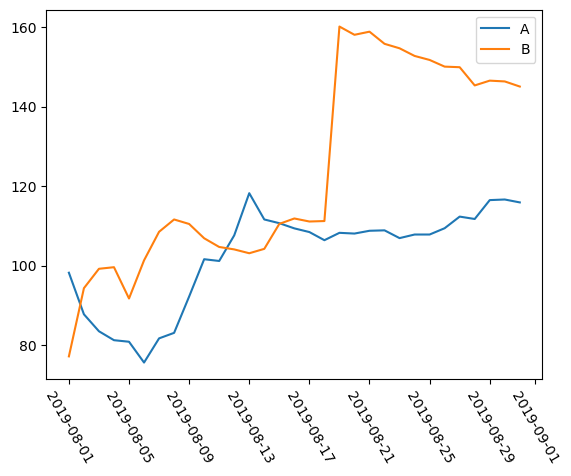

In [10]:
# Trazamos el gráfico de pedidos del grupo A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# Trazamos el gráfico de pedidos del grupo B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xticks(rotation=300)
plt.legend()

Como podemos ver en los resultados, vemos que el tamaño de pedidos para ambos pedidos se llegan a estabilizar casi al final de la prueba, sin embargo también logramos notar que al principio el tamaño de pedidos para el grupo B empezó abajo y el grupo A arriba, poco tiempo después cambiaron de lugar, casi al final notamos un gran pico por parte del grupo B.

Sin embargo notamos que en los resultados obtenidos hay varios picos en algunos puntos, esto se puede deber a valore atípicos en la información. Analizaremos ese aspecto mas adelante. 

## <a id='toc5_3_'></a>[Diferencia relativa en el tamaño de pedido](#toc0_)

Representaremos a continuación la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(18109.0, 0, '2019-08-01'),
  Text(18113.0, 0, '2019-08-05'),
  Text(18117.0, 0, '2019-08-09'),
  Text(18121.0, 0, '2019-08-13'),
  Text(18125.0, 0, '2019-08-17'),
  Text(18129.0, 0, '2019-08-21'),
  Text(18133.0, 0, '2019-08-25'),
  Text(18137.0, 0, '2019-08-29'),
  Text(18140.0, 0, '2019-09-01')])

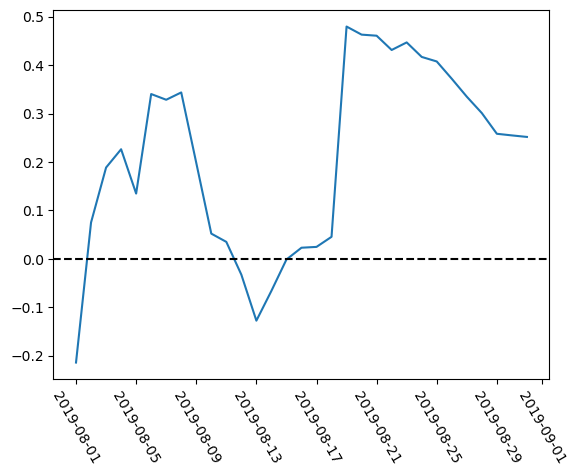

In [11]:
# Reunimos los datos en un Dataframe
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB,
    left_on = 'date',
    right_on='date',
    how='left',
    suffixes=['A','B'])

# Trazamos un gráfico de diferencia relativa para los tamaños de compra promedio 
plt.plot(mergedCumulativeRevenue['date'],
        (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1
        )

# Agregamos el eje X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=300)

Como podemos ver, la diferencia entre los segmentos aumenta. Lo cual significa que deben de haver algunos pedidos grandes y valores atípicos entre la información.

## <a id='toc5_4_'></a>[Tasa de Conversión de cada grupo](#toc0_)

En esta sección calcularemos la tasa de conversion de cada grupo como la relación de pedido y número de visitas de cada día, adicional a esto gráficaremos la relación y analizaremos los resultados.

(18109.0, 18139.0, 0.01, 0.05)

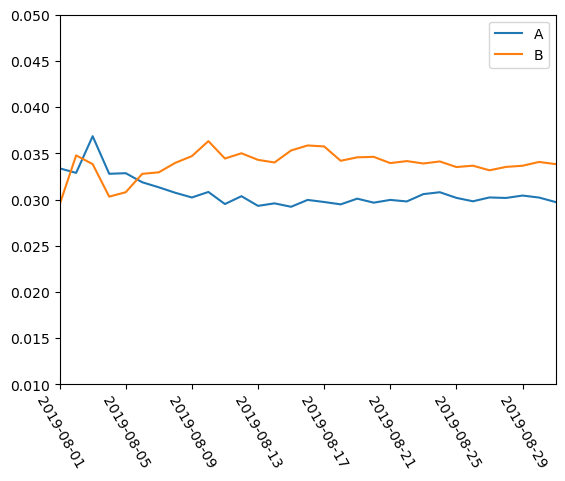

In [40]:
# Calculamos la conversión acumulada
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# Separamos por grupo A
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']

# Separamos por grupo B
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

# Trazamos los gráficos
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label = 'A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label = 'B')
plt.legend()
plt.xticks(rotation=300)

# Establecemos la escala de los ejes 
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), 0.01, 0.05])

Al inicio de la prueba notamos que el grupo A tiene una tasa de conversión mas alta que el grupo B, sin embargo vemos que mas adelante el grupo B aumento su conversión y del grupo A disminuyo, ambos grupos después de este cambio se estabilizaron en un valor casi constante.

## <a id='toc5_5_'></a>[Gráficando el numero de pedidos por usuario](#toc0_)

Para esta sección plantearemos representar los números de pedidos en una gráfica de dispersión para poder visualizar los valores atípicos de la información. Primeramente buscaremos el numero de pedidos por usuario e imprimiremos el resultado.

In [13]:
# Aislamos los números de pedidos por usuario
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

# Renombramos las columnas con nombres mas descriptivos
ordersByUsers.columns = ['userId', 'orders']

# Imprimimos el resultado
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Como podemos ver en esta tabla, notamos algunos usuarios que llegaron a realizar desde 5, 8, 9 y 11 pedidos. 

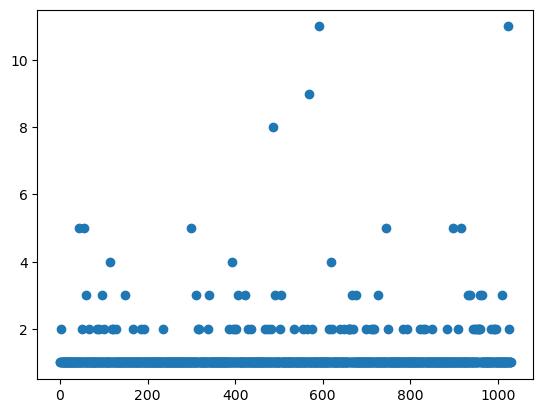

In [14]:
# Trazando el gráfico de dispersión
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.show()

Como podemos ver en la gráfica, los usuarios suelen pedir de uno a tres pedidos, los usuarios que hacen 4 pedidos o mas ya no son tan frecuentes, sin embargo para los usuarios que pidieron cuatro a cinco pedidos todavía no conocemos la proporción exacta y no esta claro si debemos de considerarlos anomalías. A continuación calcularemos los percentiles para el numero de pedidos por usuario para confirmar los resultados. 

## <a id='toc5_6_'></a>[Calculo de percentiles 95 y 99 para el numero de pedidos por usuario](#toc0_)

El objetivo de esta sección es definir el punto en el cual el numero de pedidos por usuario se vuelve una anomalía. 

In [16]:
# Calculamos los percentiles 90, 95 y 99
print("Los percentiles 90, 95 y 99 del numero de pedidos por usuario son: ", 
    np.percentile(ordersByUsers['orders'], [90, 95, 99]))

Los percentiles 90 y 95 del numero de pedidos por usuario son:  [1. 2. 4.]


Como podemos ver, no mas del 5% de los usuarios pidieron mas de 2 pedidos y el 10% de los usuarios realizaron más de 1, por lo que estableceremos el limite en 2 o 3 pedidos por usuario.

A continuación mostraremos los mismos resultados para observar los valores atípicos de los precios de los pedidos.

## <a id='toc5_7_'></a>[Gráficando precio de pedidos](#toc0_)

En esta sección representaremos el precio de los pedidos en una gráfica de dispersión para detectar valores atípicos. 

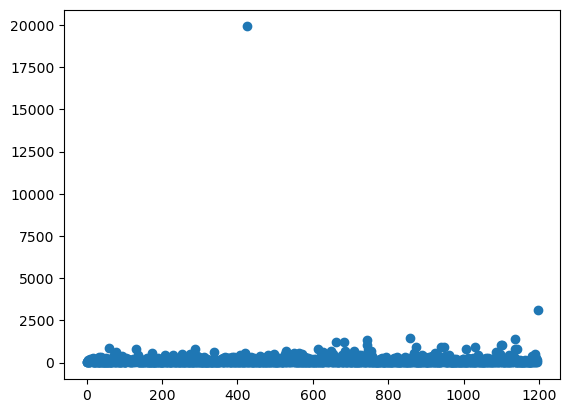

In [17]:
# Aislamos el precio de los pedidos
x_values = pd.Series(range(0, len(orders['revenue'])))

# Hacemos la gráfica de dispersión
plt.scatter(x_values, orders['revenue'])

La gráfica muestra dos valores que sobresalen de los demás aproximadamente en los $3 000 y en $20 000. En seguida calcularemos los percentiles para este apartado. 

## <a id='toc5_8_'></a>[Calculo de Percentiles 95 y 99 para el precio de pedido](#toc0_)


In [18]:
# Calculando los percentiles 90, 95 y 99 para el precio de pedido
print("Los percentiles 90, 95 y 99 del precio de pedido son: ",
    np.percentile(orders['revenue'], [90, 95, 99]))

Los percentiles 90, 95 y 99 del precio de pedido son:  [282.48  435.54  900.904]


Como podemos apreciar en los resultados, no mas del 5% de los pedidos cuestan más de $435 y no mas del 1% cuestan más de $900 por lo que podemos establecer como limite el valor de $435.

## <a id='toc5_9_'></a>[Significancia estadística de la diferencia en la conversión de los dos grupos (Datos en Bruto)](#toc0_)

En esta sección encontraremos la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Para ello crearemos dos variables `ordersByUsersA` y `ordersByUsersB` para almacenar las columnas `transactionId` y `visitorId` de los grupos "A" y "B".

In [21]:
# Creando las variables "ordersByUsersA" y "ordersByUsersB"
ordersByUsersA = (orders[orders['group'] == 'A']
                .groupby('visitorId', as_index=False)
                .agg({'transactionId': pd.Series.nunique}))
# Renombramos las columnas por nombres mas descriptivos
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (orders[orders['group'] == 'B']
                .groupby('visitorId', as_index=False)
                .agg({'transactionId': pd.Series.nunique}))
# Renombramos las columnas por nombres mas descriptivos
ordersByUsersB.columns = ['userId', 'orders']

# Mostramos las variables
display(ordersByUsersA.head(5))
display(ordersByUsersB.head(5))

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


,userId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Ahora crearemos dos variables llamadas `sampleA` y `sampleB` las cuales contendrán los números de pedidos correspondientes. Los usuarios que no pidieron nada tendrán un 0.

In [24]:
# Creando las variables "sampleA" y "sampleB"
sampleA = pd.concat([ordersByUsersA['orders'],
                    pd.Series(0, index=np.arange(
                        visitors[visitors['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])),
                            name='orders')], axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                    pd.Series(0, index=np.arange(
                        visitors[visitors['group'] == 'B']['visits'].sum() - len(ordersByUsersB['orders'])),
                            name='orders')], axis=0)


Para poder identificar la diferencia relativa haremos uso de la prueba U de Mann-Whitney. Esta prueba nos ayudara a clasificar dos muestras en orden ascendente y comparar los rangos de valores que aparecen en ambas muestras. Si las diferencias entre sus rangos son las mismas de una muestra a la otra, esto significa que el cambio es típico. Eso significa que simplemente agregaron algunos valores, lo que provocó que el resto cambiase. 

A continuación vamos a imprimir la ganancia relativa de conversión para el grupo B. 

In [33]:
# Establecemos Alpha
alpha = 0.05

# Hacemos la prueba U de Mann-Whitney
results = stats.mannwhitneyu(sampleA, sampleB)

print('Valor P: {0:.3f}'.format(results.pvalue))

# Corroboramos si hay una diferencia estadística
if (results.pvalue < alpha):
    print("La diferencia es estilísticamente significativa.")
else:
    print("No podemos sacar conclusiones sobre la diferencia.")

# Mostramos la significancia estadística 
print("La diferencia relativa en el tamaño promedio de pedido es: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

Valor P: 0.017
La diferencia es estilísticamente significativa.
La diferencia relativa en el tamaño promedio de pedido es: 0.138


Después de realizar la prueba notamos que el valor p es menor al nivel de significancia de 0.05, lo que nos dice que hay una diferencia estilísticamente significativa en la conversión entre los grupos. También podemos ver un aumento relativo de 13.8% del grupo B. 

## <a id='toc5_10_'></a>[Significancia estadística de la diferencia en el tamaño promedio entre los grupos (Datos en bruto)](#toc0_)

Con las variables obtenidas, calcularemos ahora la significancia estadística de la diferencia en el tamaño promedio de pedido entre los dos grupos. 

In [35]:
# Hacemos la prueba U de Mann-Whitney para el tamaño promedio entre los dos grupos
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print('Valor P: {0:.3f}'.format(results.pvalue))

# Corroboramos si hay una diferencia estadística
if (results.pvalue < alpha):
    print("La diferencia es estilísticamente significativa.")
else:
    print("No podemos sacar conclusiones sobre la diferencia.")    

# Mostramos la diferencia relativa en el tamaño promedio de pedido entre los grupos
print("La diferencia relativa en el tamaño promedio de pedido es: {0:.3f}".format(orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean()-1))

Valor P: 0.692
No podemos sacar conclusiones sobre la diferencia.
La diferencia relativa en el tamaño promedio de pedido es: 0.252


El valor p de la prueba realizada es considerablemente mayor por lo que no podemos rechazar la hipótesis nula y concluir que el tamaño medio de los pedido difiere entre los grupos. También podemos notar un aumento en el tamaño de pedido promedio para el grupo B de un 25.2%.

## <a id='toc5_11_'></a>[Significancia estadística de la diferencia en la conversión de los dos grupos (Datos filtrados)](#toc0_)

Volveremos a hacer las pruebas de significancia estadística de la diferencia en la conversión filtrando los datos tomando en consideración la información obtenida de usuarios anómalos. 

En base a la información obtenida eliminaremos del 1% al 5% de los usuarios con pedidos más caros y del 1% al 5% de los usuarios con mayor número de pedidos. Entonces crearemos slices de datos con usuarios que realizaron mas de tres pedidos y los usuarios que realizaron pedidos por mas de $500. Al final uniremos estos dos slices y calcularemos la significancia estadística. 

In [37]:
# Creando los slices
usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
    ordersByUsersB[ordersByUsersB['orders'] > 3]['userId']],
    axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 500]['visitorId']

# Unimos los slices
abnormalUsers = pd.concat(
    [usersWithManyOrders,usersWithExpensiveOrders],
    axis=0).drop_duplicates().sort_values()

display(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
dtype: int64

(50,)


Como podemos ver, se encontraron 50 usuarios anómalos, ahora veremos que tanto impacto tuvieron estos usuarios en los resultados de la prueba.

In [38]:
# Obteniendo las muestras para la prueba
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
    pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),
            name='orders')], axis=0)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
    pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),
            name='orders')], axis=0)

# Aplicando el criterio estadístico de Mann-Whitney a las muestras
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('Valor P: {0:.3f}'.format(results.pvalue))

# Corroboramos si hay una diferencia estadística
if (results.pvalue < alpha):
    print("La diferencia es estilísticamente significativa.")
else:
    print("No podemos sacar conclusiones sobre la diferencia.")

# Mostramos la significancia estadística 
print("La diferencia relativa en el tamaño promedio de pedido es: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


Valor P: 0.015
La diferencia es estilísticamente significativa.
La diferencia relativa en el tamaño promedio de pedido es: 0.154


Los resultados de conversión casi no cambiaron. Ahora analicemos los valores del tamaño medio de los pedidos.

## <a id='toc5_12_'></a>[Significancia estadística de la diferencia en el tamaño promedio entre los grupos (Datos en filtrados)](#toc0_)


In [39]:
# Hacemos la prueba U de Mann-Whitney para el tamaño promedio entre los dos grupos
results = stats.mannwhitneyu(
    orders[np.logical_and(orders['group']=='A',
                        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(orders['group'] == 'B',
                        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])

print('Valor P: {0:.3f}'.format(results.pvalue))

# Corroboramos si hay una diferencia estadística
if (results.pvalue < alpha):
    print("La diferencia es estilísticamente significativa.")
else:
    print("No podemos sacar conclusiones sobre la diferencia.")    

# Mostramos la diferencia relativa en el tamaño promedio de pedido entre los grupos
print("La diferencia relativa en el tamaño promedio de pedido es: {0:.3f}".format(
    orders[np.logical_and(orders['group'] == 'B',
                        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(orders['group']=='A',
                        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))


Valor P: 0.852
No podemos sacar conclusiones sobre la diferencia.
La diferencia relativa en el tamaño promedio de pedido es: 0.013


El valor P aumento pero ahora la diferencia entre los segmentos es del 1.3%. 

# <a id='toc6_'></a>[Conclusiones](#toc0_)

Después de realizar esta investigación notamos que la prueba A/B presento los siguientes resultados:

* El grupo B presento un aumento de ingresos asi como en el tamaño de pedidos a partir de la 3ra semana del comienzo de la prueba, esto pudiera deberse a que en las primeras 2 semanas que se recabo la información de los correos de los clientes a partir de la 3ra semana se vieron reflejado los resultados que provocaron los correos enviados a dichos usuarios. 

* Al inicio de la prueba la conversion entre los grupos fluctuaba un poco dando una ventaja al grupo A, sin embargo al comienzo de la segunda semana de la prueba el grupo B tomo la delantera llegando a un valor casi constante ya al final de la prueba mientras que el grupo A disminuyo y al igual que el grupo B se estabilizo en un valor casi constante ya al final de la prueba.

* Se encontraron 50 usuarios con ingresos y pedidos anómalos sin embargo estos no tuvieron mucho significancia estadística que pudieran afectar los resultados de las pruebas. 

De acuerdo a estos resultados podríamos concluir que la prueba A/B de la hipótesis "Añada un formulario de suscripción a todas las páginas principales. Esto le ayudará a compilar una lista de correos.(Add a subscription form to all the main pages. This will help you compile a mailing list)", dio un resultado positivo, la prueba debería de ser parada y los cambios deberían de ser realizados.